In [5]:
import pandas as pd

In [2]:
from sklearn import linear_model

In [3]:
import pickle

In [7]:
df=pd.read_csv("town.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [8]:
pd.get_dummies (df.town)

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [14]:
dummy=pd.get_dummies (df.town)
merge=pd.concat([df,dummy],axis='columns')

In [15]:
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [16]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [30]:
final=merge.drop(['price','town','robinsville'],axis='columns')
final

,area,monroe township,west windsor
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,1
6,2800,0,1
7,3300,0,1
8,3600,0,1
9,2600,0,0


In [31]:

y=merge.price

y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [33]:
final

,area,monroe township,west windsor
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,1
6,2800,0,1
7,3300,0,1
8,3600,0,1
9,2600,0,0


In [34]:
model.fit(final,y)

LinearRegression()

In [37]:
model.predict([[2800,0,0]])


/home/nituhimani/.local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.6396474])

In [38]:
model.score(final,y)

0.9573929037221873

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()
dfle=df
le.fit_transform(dfle.town)


array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [44]:
import numpy as np


In [43]:
dfle.town=le.fit_transform(dfle.town)

AttributeError: 'numpy.ndarray' object has no attribute 'town'

In [42]:
dfle

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [45]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [46]:
dfle=df
dfle

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [49]:
dfle.town=le.fit_transform(dfle.town)


In [50]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [51]:
x=df[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [52]:
y=df.price

In [70]:
from sklearn.preprocessing import LabelEncoder

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
ohe=OneHotEncoder(categories=[1])
X=ohe.fit_transform(x)



TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [1]:
import pandas as pd
df=pd.read_csv("carprice.csv")
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [2]:

import matplotlib.pyplot as plt
%matplotlib inline

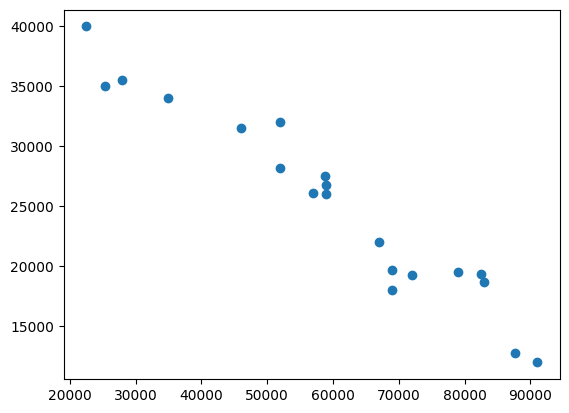

In [4]:
plt.scatter(df['Mileage'],df['Sell Price($)'])


In [5]:
from sklearn.model_selection import train_test_split

In [11]:
x=df[['Age(yrs)','Mileage']]
y=df[['Sell Price($)']]


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [17]:
len(x_train)

16

In [30]:
x_train

,Age(yrs),Mileage
1,3,35000
16,2,28000
7,6,72000
12,5,59000
3,2,22500
18,8,87600
11,7,79000
9,6,67000
2,5,57000
6,5,52000


In [31]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)

LinearRegression()

In [32]:
le.predict(x_test)

array([[22215.23785816],
       [25329.48072264],
       [16378.05536423],
       [16206.77200669]])

In [33]:
y_test

,Sell Price($)
17,19700
5,26750
14,19400
10,18700


In [35]:
le.score(x_test,y_test)

0.44287861008530705